### **Notebook to calculate biomass growth rate observations and predictions for Yoneda and Henson data**

In [83]:
#Python packages:
import numpy as np
import sys
import os
import pandas as pd
import cobra
import math
from scipy.stats import linregress
from scipy import mean

#### **Load Yoneda and Henson Data**

In [84]:
from edd_utils import login, export_study, export_metadata
# Study to Download
study_slug = 'biodesign_yoneda_set2'#multiomics-data-for-wt-strain-c157'
study_slug2 = 'biodesign_henson2108'
# EDD server
edd_server = 'public-edd.jbei.org'#agilebiofoundry.org'#'edd.jbei.org'
user       = 'schenkch'

In [89]:
session = login(edd_server=edd_server, user=user)

Password for schenkch:  ···············


In [90]:
#Export data from EDD as 2 dataframes:
df: pd.DataFrame

# filename = TBD
    
try:
    df = export_study(session, study_slug, edd_server=edd_server)
    df2 = export_study(session, study_slug2, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(filename)
    except:
        print(f'ERROR! Alternative loading of data from disk at {DISKDF} failed!')
    else:
        print(f'OK! Alternative loading of data from disk at {DISKDF} was successful.')


In [91]:
#df = export_study(session, study_slug, edd_server=edd_server)
df.head()
df2.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.50000,0.0
1,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.45308,8.0
2,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.39683,20.0
3,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.39879,24.0
4,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.21632,32.0


In [92]:
#dataDir =  '../../EDD_Yoneda_data'
#ODdata_xls = load_workbook(os.path.join(dataDir, 'Yoneda_set2_ODD_data.xlsx'))
#ODdata_xls = (os.path.join(dataDir, 'Yoneda_set2_ODD_data.xlsx'))#, index_col=None)#if multiple sheets specify sheet as well e.g. 'Sheet2'
#ODfile = ODdata_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)
#display(ODfile)
#ODfile = os.path.join(dataDir, 'Yoneda_set2_ODD_data.csv')
#Subfile = os.path.join(dataDir, 'Yoneda_set2_Metabolomics_data.csv')

OD = df[df['Protocol'].str.contains('OD600')]#pd.read_csv(ODfile)
#OD['Biomass Conc'] = OD['Value']#GRAMS_BIOMASS_PER_LITER_PER_OD*OD['Value']
#Sub = pd.read_csv(Subfile)
Sub = df[df['Protocol'].str.contains('HPLC')]

display(OD)
display(Sub)
print(f'substrate data has {len(Sub)} lines')
print(f'OD data has {len(OD)} lines')

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14218,WT-R1,NaN,Optical Density,0,NaN,0.300,0.00000
1,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14218,WT-R1,NaN,Optical Density,0,NaN,0.424,16.61361
2,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14218,WT-R1,NaN,Optical Density,0,NaN,0.687,41.23694
3,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14218,WT-R1,NaN,Optical Density,0,NaN,0.814,52.08611
4,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14218,WT-R1,NaN,Optical Density,0,NaN,0.942,61.72028
5,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14219,WT-R2,NaN,Optical Density,0,NaN,0.300,0.00000
6,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14219,WT-R2,NaN,Optical Density,0,NaN,0.443,16.61361
7,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14219,WT-R2,NaN,Optical Density,0,NaN,0.743,41.23694
8,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14219,WT-R2,NaN,Optical Density,0,NaN,0.748,52.08611
9,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,OD600,14219,WT-R2,NaN,Optical Density,0,NaN,0.901,61.72028


,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
63,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14233,WT-R1,cid:996,phenol,0,g/L,1.53118,0.00000
64,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14233,WT-R1,cid:996,phenol,0,g/L,1.38327,16.61361
65,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14233,WT-R1,cid:996,phenol,0,g/L,1.10857,41.23694
66,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14233,WT-R1,cid:996,phenol,0,g/L,0.84795,52.08611
67,13800,Biodesign_Yoneda_set2,14200,WT-R1,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14233,WT-R1,cid:996,phenol,0,g/L,0.76695,61.72028
68,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14234,WT-R2,cid:996,phenol,0,g/L,1.53999,0.00000
69,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14234,WT-R2,cid:996,phenol,0,g/L,1.41320,16.61361
70,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14234,WT-R2,cid:996,phenol,0,g/L,1.12089,41.23694
71,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14234,WT-R2,cid:996,phenol,0,g/L,0.86028,52.08611
72,13800,Biodesign_Yoneda_set2,14201,WT-R2,R. Opacus wild type strain with 1.50 g/l pheno...,HPLC,14234,WT-R2,cid:996,phenol,0,g/L,0.77752,61.72028


substrate data has 72 lines
OD data has 63 lines


In [93]:
ODHen = df2[df2['Protocol'].str.contains('OD600')]#pd.read_csv(ODfile)
#OD['Biomass Conc'] = OD['Value']#GRAMS_BIOMASS_PER_LITER_PER_OD*OD['Value']
#Sub = pd.read_csv(Subfile)
SubHen = df2[df2['Protocol'].str.contains('HPLC')]

display(ODHen)
display(SubHen)
print(f'substrate data has {len(SubHen)} lines')
print(f'OD data has {len(ODHen)} lines')

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
48,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.05000,0.0
49,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.09559,9.0
50,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.20540,19.0
51,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.28440,24.0
52,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.38354,33.0
53,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.44556,44.0
54,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.51350,55.0
55,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.54095,70.0
56,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.54194,82.0
57,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,OD600,14329,WT-P-R1,NaN,Optical Density,0,NaN,0.59783,100.0


,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.50000,0.0
1,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.45308,8.0
2,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.39683,20.0
3,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.39879,24.0
4,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.21632,32.0
5,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.19566,44.0
6,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.11259,48.0
7,13556,Biodesign_Henson2108,14299,WT-P-R1,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14323,WT-P-R1,cid:996,phenol,0,g/L,0.10284,60.0
8,13556,Biodesign_Henson2108,14300,WT-P-R2,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14324,WT-P-R2,cid:996,phenol,0,g/L,0.50000,0.0
9,13556,Biodesign_Henson2108,14300,WT-P-R2,R. Opacus wild type strain with 0.5 g/l PHE as...,HPLC,14324,WT-P-R2,cid:996,phenol,0,g/L,0.38768,8.0


substrate data has 48 lines
OD data has 60 lines


In [94]:
GRAMS_BIOMASS_PER_LITER_PER_OD = 0.368 # 1 OD = 0.35 g/L of biomass

In [236]:
#Predictions:
#display(WTR1)

#growth_rate = 
#display(WTR1.loc[0,'Value'])
#growth1 = math.log((WTR1.loc[1,'Value']*GRAMS_BIOMASS_PER_LITER_PER_OD)/(WTR1.loc[0,'Value']*GRAMS_BIOMASS_PER_LITER_PER_OD))
#growth_rate1 = growth1/(WTR1.loc[1,'Hours']-WTR1.loc[0,'Hours'])
#display(growth_rate)
def calcquantities(ODdata, Subdata, molar_mass, max_time=0):
    if max_time != 0:
        ODdata = ODdata[ODdata['Hours'] < max_time]
        Subdata = Subdata[Subdata['Hours'] < max_time]
#growth is the slope of log(biomass) vs. time
#     ODdata=WTR1OD
#     Subdata=WTR1Sub
    inittime=ODdata[['Hours']].idxmin()#calculate index of initial time in dataframe
    growth_rate, _, _, _, _ = linregress(ODdata['Hours'].to_numpy(), [math.log(val) for val in ODdata['Biomass Conc'].to_numpy()])
    initindex = inittime.values[0]

    # biomass X = X0*e^(μ*t)
    biomass_sim = [ODdata.loc[inittime,'Biomass Conc'].values[0]*math.exp(growth_rate*time) for time in ODdata['Hours']]
    #display(biomass_sim)

    # actual consumption = S0 - S
    inittimesub = Subdata[['Hours']].idxmin()#calculate index of initial time in dataframe
    initindexsub = inittimesub.values[0]
    #display(initindex)
    timestartsub = Subdata.loc[inittimesub+1, 'Hours'].values
    #display(timestartsub)
    sub_consumed = [Subdata.loc[inittimesub,'Value'].values[0]*1000/molar_mass - sub_value for sub_value in Subdata['Value']*1000/molar_mass]
    #display(sub_consumed)
    
    # new biomass X = X0 - X
    biomass_sim_growth = [sim_val - ODdata.loc[inittime,'Biomass Conc'].values[0] for sim_val in biomass_sim]
    #display(biomass_sim_growth)
    # yield is the amount of biomass that can be made from a mmol of substrate
    yield_coeff, _, _, _, _ = linregress(sub_consumed, biomass_sim_growth[0:len(sub_consumed)])#this should be done differently!!!!
    # S = S0 - (1/yield)*X
    print('YC', yield_coeff)
    substrate_sim = [Subdata.loc[inittimesub,'Value'] - 1/yield_coeff*val for val in biomass_sim_growth]
    
    # units work out to mmol substrate consumed / (g biomass * hr)
    substrate_consumption_rate = (1/yield_coeff) * growth_rate
    print('Sub', substrate_consumption_rate)
    
    total_time = ODdata['Hours'][ODdata.index[-1]] - ODdata.loc[initindex,'Hours']
    times = ODdata['Hours'].values

    return growth_rate, yield_coeff, substrate_consumption_rate, total_time, times

#### **Yoneda WT with 1.5g/L Phenol**

In [237]:
strindlist = ['WT-R1', 'WT-R2', 'WT-R3']

In [238]:
for i in strindlist:
    if i=='WT-R1':
        WTR1OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTR1Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR1OD.loc['Value'].to_numpy()
        WTR1OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR1OD.loc[:,'Value']#newvals
    if i=='WT-R2':
        WTR2OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTR2Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR1OD.loc['Value'].to_numpy()
        WTR2OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR2OD.loc[:,'Value']#newvals
    if i=='WT-R3':
        WTR3OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTR3Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR1OD.loc['Value'].to_numpy()
        WTR3OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTR3OD.loc[:,'Value']#newvals

In [239]:
growth_rateWTR1, yield_coeffWTR1, substrate_consumption_rateWTR1, total_timeWTR1, timesWTR1 = calcquantities(WTR1OD, WTR1Sub, molar_mass=94.11)
growth_rateWTR2, yield_coeffWTR2, substrate_consumption_rateWTR2, total_timeWTR2, timesWTR2 = calcquantities(WTR2OD, WTR2Sub, molar_mass=94.11)
growth_rateWTR3, yield_coeffWTR3, substrate_consumption_rateWTR3, total_timeWTR3, timesWTR3 = calcquantities(WTR3OD, WTR3Sub, molar_mass=94.11)

YC 0.027827318038384764
Sub 0.6710108805808497
YC 0.024876645223976222
Sub 0.7050026931406864
YC 0.032157638171491094
Sub 0.6285659287272015


##### **Create dataframe and add results**

In [240]:
#create dataframe for all results:
indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std', 'yield_coeff_std', 'substr_cons_rate_std']
strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['WT-R',:]=[np.average([growth_rateWTR1,growth_rateWTR2,growth_rateWTR3]), np.average([yield_coeffWTR1,yield_coeffWTR2, yield_coeffWTR3]), np.average([substrate_consumption_rateWTR1, substrate_consumption_rateWTR2, substrate_consumption_rateWTR3]), np.std([growth_rateWTR1,growth_rateWTR2,growth_rateWTR3]), np.std([yield_coeffWTR1,yield_coeffWTR2, yield_coeffWTR3]), np.std([substrate_consumption_rateWTR1, substrate_consumption_rateWTR2, substrate_consumption_rateWTR3])]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-R,NaN,NaN,NaN,NaN,NaN,NaN
WT-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G,NaN,NaN,NaN,NaN,NaN,NaN
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda Evol33 with 1.5g/L Phenol**

In [241]:
strindlist = ['EVOL33-R1', 'EVOL33-R2', 'EVOL33-R3']

In [242]:
for i in strindlist:
    if i=='EVOL33-R1':
        EVOL33R1OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL33R1Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R1OD.loc['Value'].to_numpy()
        EVOL33R1OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R1OD.loc[:,'Value']#newvals
    if i=='EVOL33-R2':
        EVOL33R2OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL33R2Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R1OD.loc['Value'].to_numpy()
        EVOL33R2OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R2OD.loc[:,'Value']#newvals
    if i=='EVOL33-R3':
        EVOL33R3OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL33R3Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R1OD.loc['Value'].to_numpy()
        EVOL33R3OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33R3OD.loc[:,'Value']#newvals

In [243]:
growth_rateEVOL33R1, yield_coeffEVOL33R1, substrate_consumption_rateEVOL33R1, total_timeEVOL33R1, timesEVOL33R1 = calcquantities(EVOL33R1OD, EVOL33R1Sub, molar_mass=94.11)
growth_rateEVOL33R2, yield_coeffEVOL33R2, substrate_consumption_rateEVOL33R2, total_timeEVOL33R2, timesEVOL33R2 = calcquantities(EVOL33R2OD, EVOL33R2Sub, molar_mass=94.11)
growth_rateEVOL33R3, yield_coeffEVOL33R3, substrate_consumption_rateEVOL33R3, total_timeEVOL33R3, timesEVOL33R3 = calcquantities(EVOL33R3OD, EVOL33R3Sub, molar_mass=94.11)

YC 0.028037553149950746
Sub 0.9616343282845016
YC 0.03288253826088062
Sub 0.9237370203865367
YC 0.03186926792938403
Sub 0.9041486727592701


##### **Add results to dataframe**

In [244]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL33-R',:]=[np.average([growth_rateEVOL33R1,growth_rateEVOL33R2,growth_rateEVOL33R3]), np.average([yield_coeffEVOL33R1,yield_coeffEVOL33R2, yield_coeffEVOL33R3]), np.average([substrate_consumption_rateEVOL33R1, substrate_consumption_rateEVOL33R2, substrate_consumption_rateEVOL33R3]),np.std([growth_rateEVOL33R1,growth_rateEVOL33R2,growth_rateEVOL33R3]), np.std([yield_coeffEVOL33R1,yield_coeffEVOL33R2, yield_coeffEVOL33R3]), np.std([substrate_consumption_rateEVOL33R1, substrate_consumption_rateEVOL33R2, substrate_consumption_rateEVOL33R3])]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,NaN,NaN,NaN,NaN,NaN,NaN
WT-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G,NaN,NaN,NaN,NaN,NaN,NaN
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda Evol40 with 1.5g/L Phenol**

In [245]:
strindlist = ['EVOL40-R1', 'EVOL40-R2', 'EVOL40-R3']

In [246]:
for i in strindlist:
    if i=='EVOL40-R1':
        EVOL40R1OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL40R1Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R1OD.loc['Value'].to_numpy()
        EVOL40R1OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R1OD.loc[:,'Value']#newvals
    if i=='EVOL40-R2':
        EVOL40R2OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL40R2Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R1OD.loc['Value'].to_numpy()
        EVOL40R2OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R2OD.loc[:,'Value']#newvals
    if i=='EVOL40-R3':
        EVOL40R3OD = OD[OD['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        EVOL40R3Sub = Sub[Sub['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R1OD.loc['Value'].to_numpy()
        EVOL40R3OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40R3OD.loc[:,'Value']#newvals

In [247]:
growth_rateEVOL40R1, yield_coeffEVOL40R1, substrate_consumption_rateEVOL40R1, total_timeEVOL40R1, timesEVOL40R1 = calcquantities(EVOL40R1OD, EVOL40R1Sub, molar_mass=94.11)
growth_rateEVOL40R2, yield_coeffEVOL40R2, substrate_consumption_rateEVOL40R2, total_timeEVOL40R2, timesEVOL40R2 = calcquantities(EVOL40R2OD, EVOL40R2Sub, molar_mass=94.11)
growth_rateEVOL40R3, yield_coeffEVOL40R3, substrate_consumption_rateEVOL40R3, total_timeEVOL40R3, timesEVOL40R3 = calcquantities(EVOL40R3OD, EVOL40R3Sub, molar_mass=94.11)

YC 0.030022929822034385
Sub 0.9075724886904972
YC 0.03436356000982102
Sub 0.8660165805735885
YC 0.03388219470406636
Sub 0.8609269368883709


##### **Add results to dataframe**

In [248]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL40-R', 'EVOL40-R', 'WT-G', 'EVOL40-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL40-R',:]=[np.average([growth_rateEVOL40R1,growth_rateEVOL40R2,growth_rateEVOL40R3]), np.average([yield_coeffEVOL40R1,yield_coeffEVOL40R2, yield_coeffEVOL40R3]), np.average([substrate_consumption_rateEVOL40R1, substrate_consumption_rateEVOL40R2, substrate_consumption_rateEVOL40R3]), np.std([growth_rateEVOL40R1,growth_rateEVOL40R2,growth_rateEVOL40R3]), np.std([yield_coeffEVOL40R1,yield_coeffEVOL40R2, yield_coeffEVOL40R3]), np.std([substrate_consumption_rateEVOL40R1, substrate_consumption_rateEVOL40R2, substrate_consumption_rateEVOL40R3])]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G,NaN,NaN,NaN,NaN,NaN,NaN
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda WT with 1.0g/L Glucose, 1.0 g/l Ammonium Sulfate**

In [249]:
WTGOD = OD[OD['Line Name']=='WT-G']#pd.read_csv(ODfile)
WTGSub = Sub[Sub['Line Name']=='WT-G']#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTGOD.loc['Value'].to_numpy()
WTGOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTGOD.loc[:,'Value']#newvals

In [250]:
growth_rateWTG, yield_coeffWTG, substrate_consumption_rateWTG, total_timeWTG, timesWTG = calcquantities(WTGOD, WTGSub, molar_mass=180.16)

YC 1.2092167902833597
Sub 0.02605723782268901


##### **Add results to dataframe**

In [251]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['WT-G',:]=[growth_rateWTG, yield_coeffWTG, substrate_consumption_rateWTG, 0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G,NaN,NaN,NaN,NaN,NaN,NaN
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda EVOL33 with 1.0g/L Glucose, 1.0 g/l Ammonium Sulfate**

In [252]:
EVOL33GOD = OD[OD['Line Name']=='EVOL33-G']#pd.read_csv(ODfile)
EVOL33GSub = Sub[Sub['Line Name']=='EVOL33-G']#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33GOD.loc['Value'].to_numpy()
EVOL33GOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33GOD.loc[:,'Value']#newvals

In [253]:
growth_rateEVOL33G, yield_coeffEVOL33G, substrate_consumption_rateEVOL33G, total_timeEVOL33G, timesEVOL33G = calcquantities(EVOL33GOD, WTGSub, molar_mass=180.16)

YC 1.1832168895748088
Sub 0.026325331169341448


##### **Add results to dataframe**

In [254]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL33-G',:]=[growth_rateEVOL33G, yield_coeffEVOL33G, substrate_consumption_rateEVOL33G, 0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,NaN,NaN,NaN,NaN,NaN,NaN
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda EVOL40 with 1.0g/L Glucose, 1.0 g/l Ammonium Sulfate**

In [255]:
EVOL40GOD = OD[OD['Line Name']=='EVOL40-G']#pd.read_csv(ODfile)
EVOL40GSub = Sub[Sub['Line Name']=='EVOL40-G']#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40GOD.loc['Value'].to_numpy()
EVOL40GOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40GOD.loc[:,'Value']#newvals

In [256]:
growth_rateEVOL40G, yield_coeffEVOL40G, substrate_consumption_rateEVOL40G, total_timeEVOL40G, timesEVOL40G = calcquantities(EVOL40GOD, EVOL40GSub, molar_mass=180.16)

YC -0.5257346324170699
Sub -0.059464757011802157


##### **Add results to dataframe**

In [257]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL40-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL40-G',:]=[growth_rateEVOL40G, yield_coeffEVOL40G, substrate_consumption_rateEVOL40G, 0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda WT with 1.0g/L Glucose, 0.05 g/l Ammonium Sulfate**

In [258]:
WTGNOD = OD[OD['Line Name'].str.contains('WT-G-N')]#pd.read_csv(ODfile)
WTGNSub = Sub[Sub['Line Name'].str.contains('WT-G-N')]#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTGNOD.loc['Value'].to_numpy()
WTGNOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTGNOD.loc[:,'Value']#newvals

In [259]:
growth_rateWTGN, yield_coeffWTGN, substrate_consumption_rateWTGN, total_timeWTGN, timesWTGN = calcquantities(WTGNOD, WTGNSub, molar_mass=180.16)

YC 1.9281822253644023
Sub 0.020228504126781063


##### **Add results to dataframe**

In [260]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['WT-G-N',:]=[growth_rateWTGN, yield_coeffWTGN, substrate_consumption_rateWTGN, 0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0
EVOL33-G-N,NaN,NaN,NaN,NaN,NaN,NaN
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda EVOL33 with 1.0g/L Glucose, 0.05 g/l Ammonium Sulfate**

In [261]:
EVOL33GNOD = OD[OD['Line Name'].str.contains('EVOL33-G-N')]#pd.read_csv(ODfile)
EVOL33GNSub = Sub[Sub['Line Name'].str.contains('EVOL33-G-N')]#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33GNOD.loc['Value'].to_numpy()
EVOL33GNOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL33GNOD.loc[:,'Value']#newvals

In [262]:
growth_rateEVOL33GN, yield_coeffEVOL33GN, substrate_consumption_rateEVOL33GN, total_timeEVOL33GN, timesEVOL33GN = calcquantities(EVOL33GNOD, EVOL33GNSub, molar_mass=180.16)

YC 1.0577876589076527
Sub 0.030952776740702657


##### **Add results to dataframe**

In [263]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL33-G-N',:]=[growth_rateEVOL33GN, yield_coeffEVOL33GN, substrate_consumption_rateEVOL33GN, 0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0
EVOL40-G-N,NaN,NaN,NaN,NaN,NaN,NaN
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Yoneda EVOL40 with 1.0g/L Glucose, 0.05 g/l Ammonium Sulfate**

In [264]:
EVOL40GNOD = OD[OD['Line Name'].str.contains('EVOL40-G-N')]#pd.read_csv(ODfile)
EVOL40GNSub = Sub[Sub['Line Name'].str.contains('EVOL40-G-N')]#pd.read_csv(ODfile)
#newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40GNOD.loc['Value'].to_numpy()
EVOL40GNOD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*EVOL40GNOD.loc[:,'Value']#newvals

In [265]:
growth_rateEVOL40GN, yield_coeffEVOL40GN, substrate_consumption_rateEVOL40GN, total_timeEVOL40GN, timesEVOL40GN = calcquantities(EVOL40GNOD, EVOL40GNSub, molar_mass=180.16)

YC 2.133006254267917
Sub 0.016013118115174904


##### **Add results to dataframe**

In [266]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['EVOL40-G-N',:]=[growth_rateEVOL40GN, yield_coeffEVOL40GN, substrate_consumption_rateEVOL40GN,  0.0, 0.0, 0.0]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0
EVOL40-G-N,0.0341561,2.13301,0.0160131,0,0,0
WT-P-R,NaN,NaN,NaN,NaN,NaN,NaN


#### **Henson WT with 0.5g/l Phenol**

In [267]:
strindlist = ['WT-P-R1', 'WT-P-R2', 'WT-P-R3']

In [268]:
for i in strindlist:
    if i=='WT-P-R1':
        WTPR1OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTPR1Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR1OD.loc['Value'].to_numpy()
        WTPR1OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR1OD.loc[:,'Value']#newvals
    if i=='WT-P-R2':
        WTPR2OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTPR2Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR1OD.loc['Value'].to_numpy()
        WTPR2OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR2OD.loc[:,'Value']#newvals
    if i=='WT-P-R3':
        WTPR3OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        WTPR3Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR1OD.loc['Value'].to_numpy()
        WTPR3OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*WTPR3OD.loc[:,'Value']#newvals

In [269]:
growth_rateWTPR1, yield_coeffWTPR1, substrate_consumption_rateWTPR1, total_timeWTPR1, timesWTPR1 = calcquantities(WTPR1OD, WTPR1Sub, molar_mass=94.11)#, max_time=40)
growth_rateWTPR2, yield_coeffWTPR2, substrate_consumption_rateWTPR2, total_timeWTPR2, timesWTPR2 = calcquantities(WTPR2OD, WTPR2Sub, molar_mass=94.11)#, max_time=34)
growth_rateWTPR3, yield_coeffWTPR3, substrate_consumption_rateWTPR3, total_timeWTPR3, timesWTPR3 = calcquantities(WTPR3OD, WTPR3Sub, molar_mass=94.11)#, max_time=34)

YC 0.011876866116438851
Sub 1.8165942877253125
YC 0.032219937001509186
Sub 1.6070231573739304
YC 0.025794501662175083
Sub 1.8600895743835884


##### **Add results to dataframe**

In [270]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['WT-P-R',:]=[np.average([growth_rateWTPR1,growth_rateWTPR2,growth_rateWTPR3]), np.average([yield_coeffWTPR1,yield_coeffWTPR2, yield_coeffWTPR3]), np.average([substrate_consumption_rateWTPR1, substrate_consumption_rateWTPR2, substrate_consumption_rateWTPR3]), np.std([growth_rateWTPR1,growth_rateWTPR2,growth_rateWTPR3]), np.std([yield_coeffWTPR1,yield_coeffWTPR2, yield_coeffWTPR3]), np.std([substrate_consumption_rateWTPR1, substrate_consumption_rateWTPR2, substrate_consumption_rateWTPR3])]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0
EVOL40-G-N,0.0341561,2.13301,0.0160131,0,0,0
WT-P-R,0.0404446,0.0232971,1.76124,0.0134323,0.0084907,0.110481


#### **Henson PVHG6 with 0.5g/l Phenol**

In [271]:
strindlist = ['PVHG6-P-R1', 'PVHG6-P-R2', 'PVHG6-P-R3']

In [272]:
for i in strindlist:
    if i=='PVHG6-P-R1':
        PVHG6R1OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        PVHG6R1Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R1OD.loc['Value'].to_numpy()
        PVHG6R1OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R1OD.loc[:,'Value']#newvals
    if i=='PVHG6-P-R2':
        PVHG6R2OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        PVHG6R2Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R1OD.loc['Value'].to_numpy()
        PVHG6R2OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R2OD.loc[:,'Value']#newvals
    if i=='PVHG6-P-R3':
        PVHG6R3OD = ODHen[ODHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        PVHG6R3Sub = SubHen[SubHen['Line Name'].str.contains(str(i))]#pd.read_csv(ODfile)
        #newvals = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R1OD.loc['Value'].to_numpy()
        PVHG6R3OD.loc[:,'Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*PVHG6R3OD.loc[:,'Value']#newvals

In [273]:
growth_ratePVHG6R1, yield_coeffPVHG6R1, substrate_consumption_ratePVHG6R1, total_timePVHG6R1, timesPVHG6R1 = calcquantities(PVHG6R1OD, PVHG6R1Sub, molar_mass=94.11)
growth_ratePVHG6R2, yield_coeffPVHG6R2, substrate_consumption_ratePVHG6R2, total_timePVHG6R2, timesPVHG6R2 = calcquantities(PVHG6R2OD, PVHG6R2Sub, molar_mass=94.11)
growth_ratePVHG6R3, yield_coeffPVHG6R3, substrate_consumption_ratePVHG6R3, total_timePVHG6R3, timesPVHG6R3 = calcquantities(PVHG6R3OD, PVHG6R3Sub, molar_mass=94.11)

YC 0.01235463630742676
Sub 2.2465691059502366
YC 0.02878055463989326
Sub 2.1787588195483405
YC 0.02782772382531321
Sub 2.2224170427259313


##### **Add results to dataframe**

In [274]:
#create dataframe for all results:
#indlist = ['growth_rate', 'yield_coeff', 'substrate_consumption_rate', 'growth_rate_std', 'yield_coeff_std', 'substr_cons_rate_std']
#strainslist = ['WT-R', 'EVOL33-R', 'EVOL40-R', 'WT-G', 'EVOL33-G', 'EVOL40-G', 'WT-G-N', 'EVOL33-G-N', 'EVOL40-G-N', 'WT-P-R', 'PVHG6-P-R']
#growthandsubstrdata = pd.DataFrame(index=strainslist, columns=indlist)
growthandsubstrdata.at['PVHG6-P-R',:]=[np.average([growth_ratePVHG6R1,growth_ratePVHG6R2,growth_ratePVHG6R3]), np.average([yield_coeffPVHG6R1,yield_coeffPVHG6R2, yield_coeffPVHG6R3]), np.average([substrate_consumption_ratePVHG6R1, substrate_consumption_ratePVHG6R2, substrate_consumption_ratePVHG6R3]), np.std([growth_ratePVHG6R1, growth_ratePVHG6R2, growth_ratePVHG6R3]), np.std([yield_coeffPVHG6R1,yield_coeffPVHG6R2, yield_coeffPVHG6R3]), np.std([substrate_consumption_ratePVHG6R1, substrate_consumption_ratePVHG6R2, substrate_consumption_ratePVHG6R3])]
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929
WT-G,0.0315088,1.20922,0.0260572,0,0,0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0
EVOL40-G-N,0.0341561,2.13301,0.0160131,0,0,0
WT-P-R,0.0404446,0.0232971,1.76124,0.0134323,0.0084907,0.110481


#### **Getting and preparing the metabolic model**

In [275]:
file_name =  "../../Ropacus_annotated_curated_with_phenol_custom_biomass.xml"
model = cobra.io.read_sbml_model(file_name)

#### **Calculate growth rate prediction via FBA and pFBA**

In [276]:
growthandsubstrdata['FBA_growth_rate']=pd.Series(np.zeros(len(growthandsubstrdata['growth_rate'])), index=growthandsubstrdata.index)
growthandsubstrdata['pFBA_growth_rate']=pd.Series(np.zeros(len(growthandsubstrdata['growth_rate'])), index=growthandsubstrdata.index)
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std,FBA_growth_rate,pFBA_growth_rate
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687,0.0,0.0
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619,0.0,0.0
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929,0.0,0.0
WT-G,0.0315088,1.20922,0.0260572,0,0,0,0.0,0.0
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0,0.0,0.0
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0,0.0,0.0
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0,0.0,0.0
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0,0.0,0.0
EVOL40-G-N,0.0341561,2.13301,0.0160131,0,0,0,0.0,0.0
WT-P-R,0.0404446,0.0232971,1.76124,0.0134323,0.0084907,0.110481,0.0,0.0


In [277]:
for index in growthandsubstrdata.index:
    with model:
        medium = model.medium
        if '-G' in index:
            model.objective = 'Growth_Glucose'
            #model.objective = 'Growth'
            sub_uptake_rate = growthandsubstrdata.loc[index,'substrate_consumption_rate']
            medium["EX_glc__D_e"] = sub_uptake_rate
            medium["EX_phenol_e"] = 0.0
            growth = 'Growth_Glucose'
            #print(index)
        else:
            model.objective = 'Growth_Phenol'
            #model.objective = 'Growth'
            sub_uptake_rate = growthandsubstrdata.loc[index,'substrate_consumption_rate']
            medium["EX_glc__D_e"] = 0.0
            medium["EX_phenol_e"] = sub_uptake_rate
            growth = 'Growth_Phenol'
            
            #print(index)
        model.medium = medium
        
        FBA_solution = model.optimize().objective_value
        try:
            pFBA_solution = cobra.flux_analysis.pfba(model).fluxes[growth]
        except:
            print('model for ' + index + ' is infeasible')
        #cobra.flux_analysis.pfba(model).objective_value#This is sum of all fluxes


            
        growthandsubstrdata.loc[index,'FBA_growth_rate'] = FBA_solution
        growthandsubstrdata.loc[index,'pFBA_growth_rate'] = pFBA_solution

model for EVOL40-G is infeasible


In [278]:
display(growthandsubstrdata)

,growth_rate,yield_coeff,substrate_consumption_rate,growth_rate_std,yield_coeff_std,substr_cons_rate_std,FBA_growth_rate,pFBA_growth_rate
WT-R,0.0188079,0.0282872,0.668193,0.0010963,0.00299019,0.0312687,0.063811,0.063811
EVOL33-R,0.0287171,0.0309298,0.92984,0.00139503,0.00208653,0.0238619,0.088797,0.088797
EVOL40-R,0.0287258,0.0327562,0.878172,0.00107233,0.0019427,0.0208929,0.083863,0.083863
WT-G,0.0315088,1.20922,0.0260572,0,0,0,0.003081,0.003081
EVOL33-G,0.0311486,1.18322,0.0263253,0,0,0,0.003113,0.003113
EVOL40-G,0.0312627,-0.525735,-0.0594648,0,0,0,0.059478,0.003113
WT-G-N,0.0390042,1.92818,0.0202285,0,0,0,0.002392,0.002392
EVOL33-G-N,0.0327415,1.05779,0.0309528,0,0,0,0.003660,0.003660
EVOL40-G-N,0.0341561,2.13301,0.0160131,0,0,0,0.001893,0.001893
WT-P-R,0.0404446,0.0232971,1.76124,0.0134323,0.0084907,0.110481,0.168193,0.168193


####  **Generate scatter plot to compare observed and predicted growth rates (FBA, pFBA)**

In [279]:
#Scatterplot of solutions
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

def maefunc(y_predict, y_actual):
    """Mean Absolute Error.
    Multioutput case included."""

    if y_actual.ndim == 1:
        return np.mean(np.abs([y_a - y_p for y_a, y_p in zip(y_actual, y_predict)]))
    else:
        return [
            np.mean(
                np.abs([y_a - y_p for y_a, y_p in zip(y_actual[:, i], y_predict[:, i])])
            )
            for i in range(y_actual.shape[1])
        ]
    
def scatterplotcompare(observed, predicted, labels, strtitle):
    fig, ax = plt.subplots(figsize=(8, 8))
    #res = stats.linregress(observed.to_numpy().astype(float), predicted.to_numpy())
    #print(res.rvalue**2)
    lims = [
                np.min([observed, predicted]),  # min of both axes
                np.max([observed, predicted]),  # max of both axes
            ]
    ax.set_xlim(lims)
    #ax.plot([0.0, 0.2], [0.0, 0.2], 'k',  c='0.55')
    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    for i in range(0, len(observed)):
        ax.scatter(observed[i], predicted[i])
        ax.annotate(str(labels[i]),(observed[i],predicted[i]))
    #ax.annotate("r-squared = {:.3f}".format(round(r2_score(observed, predicted))), (0, 1))
    #plt.plot(observed, res.intercept + res.slope*observed, 'k', label='fitted line')
    rss = np.sum((predicted - observed) ** 2)
    tss = np.sum((predicted - predicted.mean()) ** 2)
    r2_1 = round(1 - rss / tss,2)
    #display(r2_1)
    #r2 = round(r2_score(observed, predicted),2)
    mse = np.round(1/len(observed) * rss,2) 
    rmse = np.round(np.sqrt(1/len(observed) * rss),2)
    #display(rmse)
    #display(r2_score(observed, predicted))
    mae_score = round(maefunc(observed, predicted),2)
    plt.xlabel(r'Observed growth rates [$mmol/gDW/hr$]')
    plt.ylabel(r'Predicted growth rates [$mmol/gDW/hr$]')
    plt.title(r'Growth rates: Observed vs. Predicted ('+strtitle+'), \n' + f"$R^2$={r2_1}, MAE={mae_score}, MSE = {mse}, RMSE={rmse}", fontsize=18)
    plt.show()

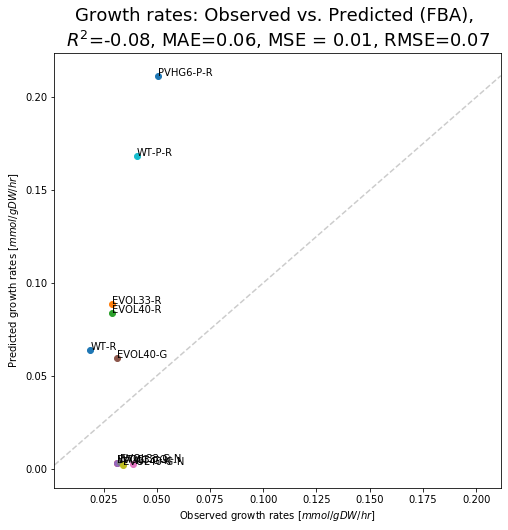

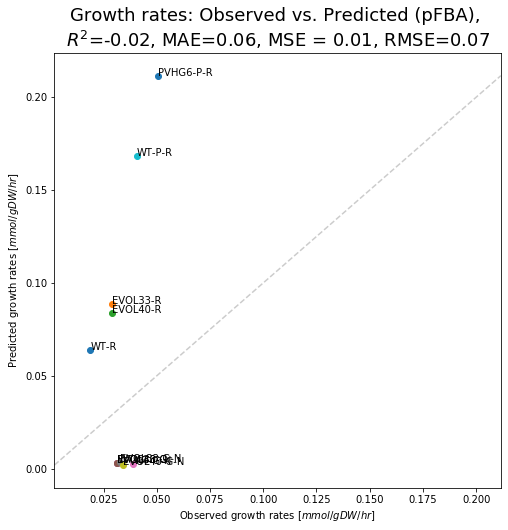

In [280]:
scatterplotcompare(growthandsubstrdata['growth_rate'], growthandsubstrdata['FBA_growth_rate'], growthandsubstrdata.index, 'FBA')
scatterplotcompare(growthandsubstrdata['growth_rate'], growthandsubstrdata['pFBA_growth_rate'], growthandsubstrdata.index, 'pFBA')